In [6]:
import numpy as np
%matplotlib inline
import Corrfunc

import utils
import plotter

%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
def plot_cf_err(rs, cf_arrs, r_true, cf_true, labels, colors):
    
    mean = np.mean(cfs, axis=0)
    std = np.std(cfs, axis=0)
    error_regions = [mean-std, mean+std]
    
    plotter.plot_cf_cont([r], [mean], r_true, cf_true, labels, colors, error_regions=[error_regions])

(1, 1000)
rmse: True
plotting


(-0.0008365369486167396, 0.021026480444039874)

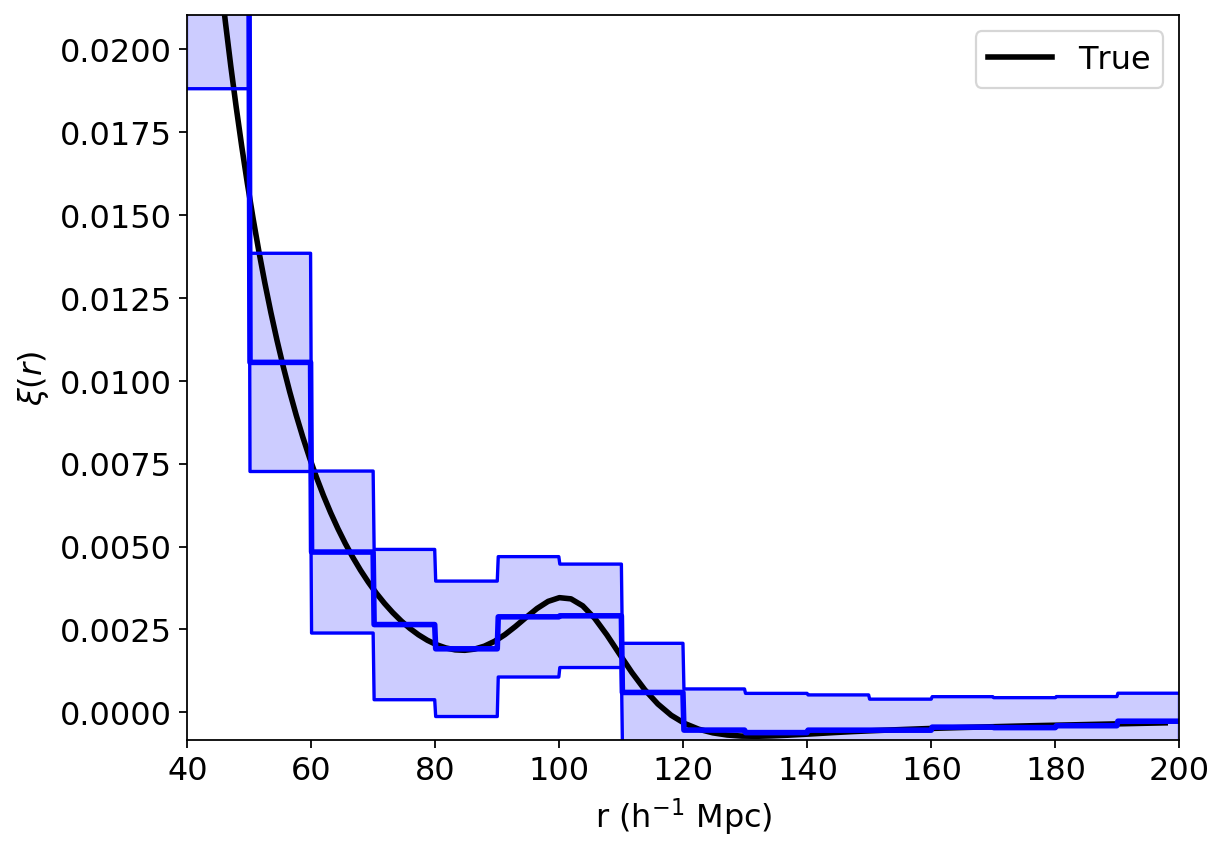

In [18]:
#cat_tag = 'test'
#cat_tag = '_L750_N125k'
cat_tag = '_L750_n1e-4'
cf_tag = '_tophat_bw10'
Nrealizations = 100
cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

labels = [cf_tag]
colors = ['blue']
#plt.figure(figsize=(10,8))
xis = []

for Nr in range(Nrealizations):
    cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tag, cat_tag, Nr)
    r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
    xis.append(xi)
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)

b1 = 1.5    
xi_true *= b1**2
plot_cf_err(r_avg, xis, r_true, xi_true, labels, colors)


#plt.xscale('log')
#plt.yscale('log')
plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))
#plt.xlim(min(r_avg), max(r_avg))
#plt.ylim(min(xi), max(xi))

(-0.0008365369486167396, 0.021026480444039874)

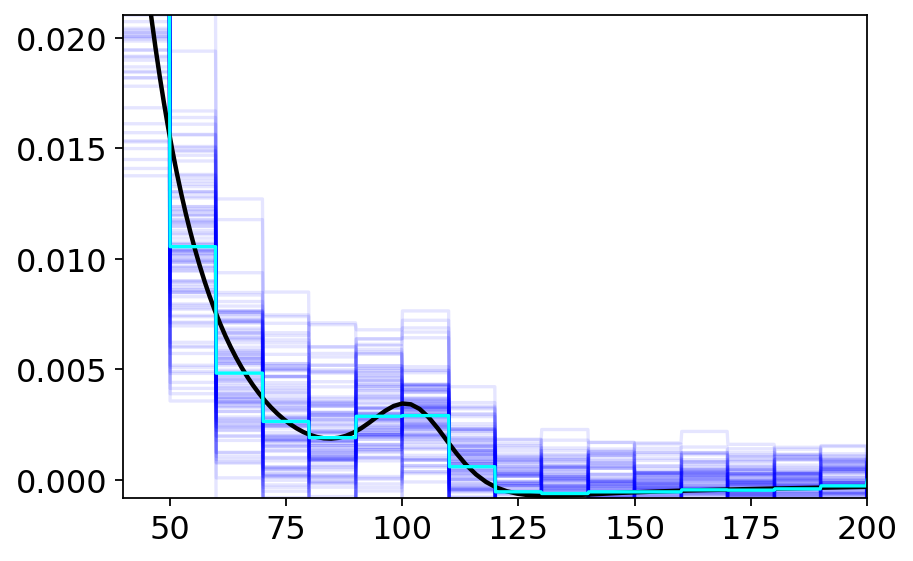

In [9]:
#cat_tag = 'test'
#cat_tag = '_L750_N125k'
cat_tag = '_L750_n1e-4'
cf_tag = '_tophat_bw10'
Nrealizations = 100
cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

#plt.figure(figsize=(10,8))
xis = []

for Nr in range(Nrealizations):
    cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tag, cat_tag, Nr)
    r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
    xis.append(xi)
    
    # true
    true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
    r_true, xi_true = np.loadtxt(true_fn, unpack=True)
    b1 = 1.5

    plt.plot(r_avg, xi, color='blue', alpha = 0.1)

    
xi_avg = np.mean(np.array(xis), axis=0)
plt.plot(r_true, xi_true*b1**2, color='k', lw=2)
plt.plot(r_avg, xi_avg, color='cyan', lw=1.5)


#plt.xscale('log')
#plt.yscale('log')
plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))
#plt.xlim(min(r_avg), max(r_avg))
#plt.ylim(min(xi), max(xi))